In [1]:
# import the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# import the dataset

In [5]:
df=pd.read_csv('./housingData-Real.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# select the columns

In [7]:
price,lvs=df['price'],df['sqft_living']

In [8]:
price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [9]:
lvs

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [11]:
# check if it contains any missing values
df[(df['sqft_living']==np.NaN)|(df['price']==np.NaN)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [12]:
# convert both series into array

In [22]:
y,X=np.array(price).reshape(-1,1),np.array(lvs).reshape(-1,1)

In [23]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [24]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
X_train

array([[2740],
       [4020],
       [1560],
       ...,
       [2360],
       [2730],
       [ 770]], dtype=int64)

In [27]:
X_test

array([[3170],
       [2210],
       [2840],
       ...,
       [3650],
       [1200],
       [3730]], dtype=int64)

In [28]:
y_train

array([[1157400.],
       [1075000.],
       [ 566000.],
       ...,
       [ 431000.],
       [ 905000.],
       [ 156000.]])

In [29]:
y_test

array([[ 820000.],
       [ 455000.],
       [ 425000.],
       ...,
       [2400000.],
       [ 232000.],
       [ 360000.]])

In [30]:
# build a linear regression model

In [31]:
regressor=LinearRegression()

In [32]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_predicted=regressor.predict(X_test)
y_predicted

array([[ 845763.36114126],
       [ 576489.10079629],
       [ 753200.33414767],
       ...,
       [ 980400.49131374],
       [ 293190.13939168],
       [1002840.01300916]])

In [34]:
y_test

array([[ 820000.],
       [ 455000.],
       [ 425000.],
       ...,
       [2400000.],
       [ 232000.],
       [ 360000.]])

In [35]:
# plot the predictions

In [36]:
# plot for training dataset

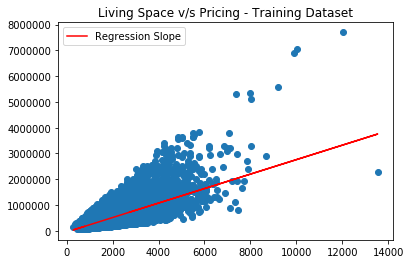

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),label='Regression Slope',color='red')
plt.title("Living Space v/s Pricing - Training Dataset")
plt.legend()

In [38]:
# plot for test dataset

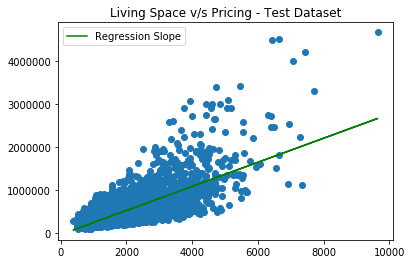

In [42]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),label='Regression Slope',color='green')
plt.title("Living Space v/s Pricing - Test Dataset")
plt.legend()

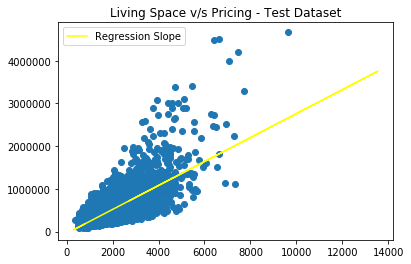

In [43]:
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),label='Regression Slope',color='yellow')
plt.title("Living Space v/s Pricing - Test Dataset")
plt.legend()